In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', None)
df = pd.read_csv('Prompt-Data-Small.csv')
df[df['ANON_ID']==22]
#Add feature for when the code didn't compile
#What tests failed?
#Inspect timestamps between prompts
#look at changes people made between consecutive prompts
df.isnull().sum()

ANON_ID                0
Class_ID               0
Question Id            0
Prompt                 0
Promptly_Response     19
Stderr               359
Stdout               553
Timestamp              0
dtype: int64

In [78]:
df[df['Promptly_Response'].isnull()]
#Prompts that don't produce any output, an example of unsuccessful prompt?

ANON_ID             Class_ID  Question Id  \
257        38  COMPSCI101 - Lab 11            1   
258        38  COMPSCI101 - Lab 11            1   
260        38  COMPSCI101 - Lab 11            1   
261        38  COMPSCI101 - Lab 11            1   
262        38  COMPSCI101 - Lab 11            1   
761        96  COMPSCI101 - Lab 11            2   
764        96  COMPSCI101 - Lab 11            2   
766        96  COMPSCI101 - Lab 11            2   
767        96  COMPSCI101 - Lab 11            2   
768        96  COMPSCI101 - Lab 11            2   
779        96  COMPSCI101 - Lab 11            2   
781        96  COMPSCI101 - Lab 11            2   
823        98  COMPSCI101 - Lab 10            1   
869       102  COMPSCI101 - Lab 10            1   
870       102  COMPSCI101 - Lab 10            1   
1263      146  COMPSCI101 - Lab 11            1   
1274      149  COMPSCI101 - Lab 11            2   
1278      149  COMPSCI101 - Lab 11            2   
1281      149  COMPSCI101 - Lab 11            2   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [79]:
df['Class_ID'].unique()

array(['COMPSCI101 - Lab 11', 'COMPSCI101 - Lab 10',
       'COMPSCI130 - Lab 10'], dtype=object)

In [80]:
df[df['Class_ID']=='COMPSCI130 - Lab 10']
#looks like an error, probably just should be removed

,ANON_ID,Class_ID,Question Id,Prompt,Promptly_Response,Stderr,Stdout,Timestamp
1395,157,COMPSCI130 - Lab 10,1,Write me a Python function called counter() that takes a parameter of integers and returns the number of zeros in the list.,\n\ndef counter(integers):\n return sum(1 for i in integers if i == 0),NaN,NaN,2023-08-19T03:20:25.546Z
1396,157,COMPSCI130 - Lab 10,1,Write me a Python function called counter(numbers_list) that returns the number of zeros in the list.,\n\ndef counter(numbers_list):\n return len([x for x in numbers_list if x == 0]),NaN,NaN,2023-08-19T03:17:59.619Z
1397,157,COMPSCI130 - Lab 10,1,Write me a Python function called counter(numbers_list) that returns the number of zeros in the list.,\n\ndef counter(numbers_list):\n return len([x for x in numbers_list if x == 0]),NaN,NaN,2023-08-19T03:17:44.872Z
1398,157,COMPSCI130 - Lab 10,1,Write me a Python function called counter(numbers_list) that returns the number of zeros in the list.,\n\ndef counter(numbers_list):\n return numbers_list.count(0),NaN,NaN,2023-08-19T03:13:22.918Z


In [81]:
df

,ANON_ID,Class_ID,Question Id,Prompt,Promptly_Response,Stderr,Stdout,Timestamp
0,1,COMPSCI101 - Lab 11,2,"Write me a Python function called arrange that takes some words and converts them into only the alphabet letters and arranges them alphabetically starting with capitalised letters first ABCD then lower case letters abcd, remove all not alpha characters and dont repeat upper and lower chars","\n\ndef arrange(words):\n # Remove all non-alpha characters and convert to lowercase\n words = [char.lower() for char in words if char.isalpha()]\n # Sort words alphabetically, capitalised letters first\n words.sort(key=str.lower)\n return ''.join(words)",Test failed for input abcabc\nExpected result was ccbbaa\nBut actual result was aabbcc\n\n,Test failed for input abcabc\nExpected result was ccbbaa\nBut actual result was aabbcc\n\nTest failed for input <3I LOVE CS<3\nExpected result was CEILOSV\nBut actual result was ceilosv\n\nTest failed for input asdf\nExpected result was sfda\nBut actual result was adfs\n\nTest failed for input 3asd32df asdsaf3\nExpected result was sssffdddaaa\nBut actual result was aaadddffsss\n\nTest failed for input 123 X 456\nExpected result was X\nBut actual result was x\n\nTest failed for input T12heZ3yrie1\nExpected result was TZyrihee\nBut actual result was eehirtyz\n\nTest failed for input Z1 x2 v*\nExpected result was Zxv\nBut actual result was vxz\n\nTest failed for input abc BCA\nExpected result was ABCcba\nBut actual result was aabbcc\n\n,2023-08-24T12:18:17.540Z
1,1,COMPSCI101 - Lab 11,2,"Write me a Python function called arrange that takes some words and converts them into only the alphabet letters and arranges them alphabetically starting with capitalised letters first ABCD then lower case letters abcd, remove all not alpha characters",\n\ndef arrange(words):\n words = ''.join(c for c in words if c.isalpha())\n words = words.upper() + words.lower()\n return ''.join(sorted(words)),Test failed for input 3asd32df asdsaf3\nExpected result was sssffdddaaa\nBut actual result was AAADDDFFSSSaaadddffsss\n\n,Test failed for input 3asd32df asdsaf3\nExpected result was sssffdddaaa\nBut actual result was AAADDDFFSSSaaadddffsss\n\nTest failed for input T12heZ3yrie1\nExpected result was TZyrihee\nBut actual result was EEHIRTYZeehirtyz\n\nTest failed for input asdf\nExpected result was sfda\nBut actual result was ADFSadfs\n\nTest failed for input abc BCA\nExpected result was ABCcba\nBut actual result was AABBCCaabbcc\n\nTest failed for input Z1 x2 v*\nExpected result was Zxv\nBut actual result was VXZvxz\n\nTest failed for input <3I LOVE CS<3\nExpected result was CEILOSV\nBut actual result was CEILOSVceilosv\n\nTest failed for input abcabc\nExpected result was ccbbaa\nBut actual result was AABBCCaabbcc\n\nTest failed for input 123 X 456\nExpected result was X\nBut actual result was Xx\n\n,2023-08-23T09:46:09.959Z
2,1,COMPSCI101 - Lab 11,2,Write me a Python function called arrange that takes some words and converts them into only the alphabet letters and arranges them alphabetically starting with capitalised letters first ABCD then lower case letters abcd,\n\ndef arrange(words):\n # Create a set of all the letters in the words\n letters = set()\n for word in words:\n for letter in word:\n letters.add(letter)\n \n # Sort the letters alphabetically\n sorted_letters = sorted(list(letters))\n \n # Separate the capitalised letters from the lowercase\n capital_letters = []\n lower_letters = []\n for letter in sorted_letters:\n if letter.isupper():\n capital_letters.append(letter)\n else:\n lower_letters.append(letter)\n \n # Join the lists and return the result\n return ''.join(capital_letters + lower_letters),Test failed for input Z1 x2 v*\nExpected result was Zxv\nBut actual result was Z *12vx\n\n,Test failed for input Z1 x2 v*\nExpected result was Zxv\nBut actual result was Z *12vx\n\nTest failed for input asdf\nExpected result was sfda\nBut actual result was adfs\n\nTest failed for input abcabc\nExpected result was

In [82]:
def check_traceback(row):
    if "Traceback (most recent call last)" in row or "SyntaxError" in row or "IndentationError" in row:
        return 0
    else:
        return 1


df[df['Stderr'].isnull()]
df['Stderr']=df['Stderr'].fillna('Compiled')
df['Compiled'] = df['Stderr'].apply(check_traceback)

In [83]:
df[df['Stdout'].isnull()&df['Compiled']==1]

,ANON_ID,Class_ID,Question Id,Prompt,Promptly_Response,Stderr,Stdout,Timestamp,Compiled
1395,157,COMPSCI130 - Lab 10,1,Write me a Python function called counter() that takes a parameter of integers and returns the number of zeros in the list.,\n\ndef counter(integers):\n return sum(1 for i in integers if i == 0),Compiled,NaN,2023-08-19T03:20:25.546Z,1
1396,157,COMPSCI130 - Lab 10,1,Write me a Python function called counter(numbers_list) that returns the number of zeros in the list.,\n\ndef counter(numbers_list):\n return len([x for x in numbers_list if x == 0]),Compiled,NaN,2023-08-19T03:17:59.619Z,1
1397,157,COMPSCI130 - Lab 10,1,Write me a Python function called counter(numbers_list) that returns the number of zeros in the list.,\n\ndef counter(numbers_list):\n return len([x for x in numbers_list if x == 0]),Compiled,NaN,2023-08-19T03:17:44.872Z,1
1398,157,COMPSCI130 - Lab 10,1,Write me a Python function called counter(numbers_list) that returns the number of zeros in the list.,\n\ndef counter(numbers_list):\n return numbers_list.count(0),Compiled,NaN,2023-08-19T03:13:22.918Z,1


In [84]:
#drop the outliers
drop_ids= df[df['Class_ID']=='COMPSCI130 - Lab 10'].index

In [85]:
df = df.drop(drop_ids)

In [86]:
df[df['Stdout'].isnull()&df['Compiled']==1]

,ANON_ID,Class_ID,Question Id,Prompt,Promptly_Response,Stderr,Stdout,Timestamp,Compiled


In [87]:
df[df['Stdout'].isnull()]

,ANON_ID,Class_ID,Question Id,Prompt,Promptly_Response,Stderr,Stdout,Timestamp,Compiled
6,1,COMPSCI101 - Lab 10,3,"take a list of numbers and print each number by the original number in the list, returning a list",\n\ndef list_original_number(numbers):\n output = []\n for num in numbers:\n output.append(num * num)\n return output,"Traceback (most recent call last):\n File ""/home/jobe/runs/jobe_Fqs4HY/test.c"", line 20, in <module>\n result = repeat(test_input)\nNameError: name 'repeat' is not defined\n",NaN,2023-08-22T11:00:04.556Z,0
8,1,COMPSCI101 - Lab 10,2,write a python function that takes a string of words and turns the initials (the first letters) of each word and capitalises them,"\n\ndef getInitials(words): \n initials = """" \n for word in words.split(): \n initials += word[0].upper() \n return initials","Traceback (most recent call last):\n File ""/home/jobe/runs/jobe_zs1YYF/test.c"", line 20, in <module>\n result = initials(test_input)\nNameError: name 'initials' is not defined. Did you mean: 'getInitials'?\n",NaN,2023-08-22T10:58:30.466Z,0
13,1,COMPSCI101 - Lab 10,2,Write me a Python function called find the first letter of each word in a list and the output must be a capitalisation of this,\n\ndef find_first_letter(words):\n return [word[0].capitalize() for word in words],"Traceback (most recent call last):\n File ""/home/jobe/runs/jobe_Tjj1BU/test.c"", line 17, in <module>\n result = initials(test_input)\nNameError: name 'initials' is not defined\n",NaN,2023-08-22T10:55:15.508Z,0
14,1,COMPSCI101 - Lab 10,2,Write me a Python function called capitalise the initials of each first letter in a word,\n\ndef capitalise_initials(word): \n initials = '' \n for letter in word: \n initials += letter.upper()[0]\n return initials,"Traceback (most recent call last):\n File ""/home/jobe/runs/jobe_ZXuwej/test.c"", line 20, in <module>\n result = initials(test_input)\nNameError: name 'initials' is not defined\n",NaN,2023-08-22T10:54:09.782Z,0
15,1,COMPSCI101 - Lab 10,2,Write me a Python function called capitalise the first letter of each word as initials,"\n\ndef capitalise_initials(words): \n initials = """" \n for word in words.split(): \n initials += word[0].upper() \n return initials","Traceback (most recent call last):\n File ""/home/jobe/runs/jobe_c6s3mr/test.c"", line 20, in <module>\n result = initials(test_input)\nNameError: name 'initials' is not defined\n",NaN,2023-08-22T10:53:43.629Z,0
...,...,...,...,...,...,...,...,...,...
1711,200,COMPSCI101 - Lab 10,3,Write me a Python function called def repeat(test_input) that repeats an integer by a multiple of itself,\n\ndef repeat(test_input):\n return test_input * test_input,"Traceback (most recent call last):\n File ""/home/jobe/runs/jobe_ph21WH/test.c"", line 17, in <module>\n result = repeat(test_input)\n File ""/home/jobe/runs/jobe_ph21WH/test.c"", line 4, in repeat\n return test_input * test_input\nTypeError: can't multiply sequence by non-int of type 'list'\n",NaN,2023-08-21T10:35:23.012Z,0
1715,200,COMPSCI101 - Lab 10,1,Write me a Python function called def zero_counter(test_input),\n\ndef zero_counter(test_input):\n count = 0\n for i in test_input:\n if i == 0:\n count += 1\n return count,"Traceback (most recent call last):\n File ""/home/jobe/runs/jobe_knsS0f/test.c"", line 21, in <module>\n result = counter(test_input)\nNameError: name 'counter' is not defined\n",NaN,2023-08-21T10:31:15.954Z,0
1716,200,COMPSCI101 - Lab 10,1,Write me a Python function called def counter_of_zeroes(list),\n\ndef counter_of_zeroes(list):\n count = 0\n for element in list:\n if element == 0:\n count += 1\n return count,"Traceback (most recent call last):\n File ""/home/jobe/runs/jobe_NYvxLb/test.c"", line 21, in <module>\n result = counter(test_input)\nNameError: name 'counter' is not defined\n",NaN,2023-08-21T10:30:45.455Z,0
1717,200,COMPSCI101 - Lab 10,1,Write me a Python function called def counter_zeroes(list),\n\ndef counter_zeroes(list):\n count = 0\n for element in list:\n if el

In [88]:
df.dtypes

ANON_ID               int64
Class_ID             object
Question Id           int64
Prompt               object
Promptly_Response    object
Stderr               object
Stdout               object
Timestamp            object
Compiled              int64
dtype: object

In [89]:
df['Stdoutput'] = [0 if pd.isnull(x) else x for x in df['Stdout']]

In [90]:
df = df.drop('Stdout', axis=1)

In [91]:
df[df['Stdoutput']==0]

,ANON_ID,Class_ID,Question Id,Prompt,Promptly_Response,Stderr,Timestamp,Compiled,Stdoutput
6,1,COMPSCI101 - Lab 10,3,"take a list of numbers and print each number by the original number in the list, returning a list",\n\ndef list_original_number(numbers):\n output = []\n for num in numbers:\n output.append(num * num)\n return output,"Traceback (most recent call last):\n File ""/home/jobe/runs/jobe_Fqs4HY/test.c"", line 20, in <module>\n result = repeat(test_input)\nNameError: name 'repeat' is not defined\n",2023-08-22T11:00:04.556Z,0,0
8,1,COMPSCI101 - Lab 10,2,write a python function that takes a string of words and turns the initials (the first letters) of each word and capitalises them,"\n\ndef getInitials(words): \n initials = """" \n for word in words.split(): \n initials += word[0].upper() \n return initials","Traceback (most recent call last):\n File ""/home/jobe/runs/jobe_zs1YYF/test.c"", line 20, in <module>\n result = initials(test_input)\nNameError: name 'initials' is not defined. Did you mean: 'getInitials'?\n",2023-08-22T10:58:30.466Z,0,0
13,1,COMPSCI101 - Lab 10,2,Write me a Python function called find the first letter of each word in a list and the output must be a capitalisation of this,\n\ndef find_first_letter(words):\n return [word[0].capitalize() for word in words],"Traceback (most recent call last):\n File ""/home/jobe/runs/jobe_Tjj1BU/test.c"", line 17, in <module>\n result = initials(test_input)\nNameError: name 'initials' is not defined\n",2023-08-22T10:55:15.508Z,0,0
14,1,COMPSCI101 - Lab 10,2,Write me a Python function called capitalise the initials of each first letter in a word,\n\ndef capitalise_initials(word): \n initials = '' \n for letter in word: \n initials += letter.upper()[0]\n return initials,"Traceback (most recent call last):\n File ""/home/jobe/runs/jobe_ZXuwej/test.c"", line 20, in <module>\n result = initials(test_input)\nNameError: name 'initials' is not defined\n",2023-08-22T10:54:09.782Z,0,0
15,1,COMPSCI101 - Lab 10,2,Write me a Python function called capitalise the first letter of each word as initials,"\n\ndef capitalise_initials(words): \n initials = """" \n for word in words.split(): \n initials += word[0].upper() \n return initials","Traceback (most recent call last):\n File ""/home/jobe/runs/jobe_c6s3mr/test.c"", line 20, in <module>\n result = initials(test_input)\nNameError: name 'initials' is not defined\n",2023-08-22T10:53:43.629Z,0,0
...,...,...,...,...,...,...,...,...,...
1711,200,COMPSCI101 - Lab 10,3,Write me a Python function called def repeat(test_input) that repeats an integer by a multiple of itself,\n\ndef repeat(test_input):\n return test_input * test_input,"Traceback (most recent call last):\n File ""/home/jobe/runs/jobe_ph21WH/test.c"", line 17, in <module>\n result = repeat(test_input)\n File ""/home/jobe/runs/jobe_ph21WH/test.c"", line 4, in repeat\n return test_input * test_input\nTypeError: can't multiply sequence by non-int of type 'list'\n",2023-08-21T10:35:23.012Z,0,0
1715,200,COMPSCI101 - Lab 10,1,Write me a Python function called def zero_counter(test_input),\n\ndef zero_counter(test_input):\n count = 0\n for i in test_input:\n if i == 0:\n count += 1\n return count,"Traceback (most recent call last):\n File ""/home/jobe/runs/jobe_knsS0f/test.c"", line 21, in <module>\n result = counter(test_input)\nNameError: name 'counter' is not defined\n",2023-08-21T10:31:15.954Z,0,0
1716,200,COMPSCI101 - Lab 10,1,Write me a Python function called def counter_of_zeroes(list),\n\ndef counter_of_zeroes(list):\n count = 0\n for element in list:\n if element == 0:\n count += 1\n return count,"Traceback (most recent call last):\n File ""/home/jobe/runs/jobe_NYvxLb/test.c"", line 21, in <module>\n result = counter(test_input)\nNameError: name 'counter' is not defined\n",2023-08-21T10:30:45.455Z,0,0
1717,200,COMPSCI101 - Lab 10,1,Write me a Python function called def counter_zeroes(list),\n\ndef counter_zeroes(list):\n count = 0\n for element in list:\n if element == 0:\n

In [92]:
df[df['Promptly_Response'].isnull()]

ANON_ID             Class_ID  Question Id  \
257        38  COMPSCI101 - Lab 11            1   
258        38  COMPSCI101 - Lab 11            1   
260        38  COMPSCI101 - Lab 11            1   
261        38  COMPSCI101 - Lab 11            1   
262        38  COMPSCI101 - Lab 11            1   
761        96  COMPSCI101 - Lab 11            2   
764        96  COMPSCI101 - Lab 11            2   
766        96  COMPSCI101 - Lab 11            2   
767        96  COMPSCI101 - Lab 11            2   
768        96  COMPSCI101 - Lab 11            2   
779        96  COMPSCI101 - Lab 11            2   
781        96  COMPSCI101 - Lab 11            2   
823        98  COMPSCI101 - Lab 10            1   
869       102  COMPSCI101 - Lab 10            1   
870       102  COMPSCI101 - Lab 10            1   
1263      146  COMPSCI101 - Lab 11            1   
1274      149  COMPSCI101 - Lab 11            2   
1278      149  COMPSCI101 - Lab 11            2   
1281      149  COMPSCI101 - Lab 11            2   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [93]:
df['Prompt'] = [0 if pd.isnull(x) else x for x in df['Promptly_Response']]

In [94]:
df = df.drop('Promptly_Response', axis=1)

In [95]:
df.isnull().sum()

ANON_ID        0
Class_ID       0
Question Id    0
Prompt         0
Stderr         0
Timestamp      0
Compiled       0
Stdoutput      0
dtype: int64

In [96]:
def length(row):
    ls = str(row).split()
    return len(ls)
df['prompt_len'] = df['Prompt'].apply(length)

In [97]:
df

,ANON_ID,Class_ID,Question Id,Prompt,Stderr,Timestamp,Compiled,Stdoutput,prompt_len
0,1,COMPSCI101 - Lab 11,2,"\n\ndef arrange(words):\n # Remove all non-alpha characters and convert to lowercase\n words = [char.lower() for char in words if char.isalpha()]\n # Sort words alphabetically, capitalised letters first\n words.sort(key=str.lower)\n return ''.join(words)",Test failed for input abcabc\nExpected result was ccbbaa\nBut actual result was aabbcc\n\n,2023-08-24T12:18:17.540Z,1,Test failed for input abcabc\nExpected result was ccbbaa\nBut actual result was aabbcc\n\nTest failed for input <3I LOVE CS<3\nExpected result was CEILOSV\nBut actual result was ceilosv\n\nTest failed for input asdf\nExpected result was sfda\nBut actual result was adfs\n\nTest failed for input 3asd32df asdsaf3\nExpected result was sssffdddaaa\nBut actual result was aaadddffsss\n\nTest failed for input 123 X 456\nExpected result was X\nBut actual result was x\n\nTest failed for input T12heZ3yrie1\nExpected result was TZyrihee\nBut actual result was eehirtyz\n\nTest failed for input Z1 x2 v*\nExpected result was Zxv\nBut actual result was vxz\n\nTest failed for input abc BCA\nExpected result was ABCcba\nBut actual result was aabbcc\n\n,30
1,1,COMPSCI101 - Lab 11,2,\n\ndef arrange(words):\n words = ''.join(c for c in words if c.isalpha())\n words = words.upper() + words.lower()\n return ''.join(sorted(words)),Test failed for input 3asd32df asdsaf3\nExpected result was sssffdddaaa\nBut actual result was AAADDDFFSSSaaadddffsss\n\n,2023-08-23T09:46:09.959Z,1,Test failed for input 3asd32df asdsaf3\nExpected result was sssffdddaaa\nBut actual result was AAADDDFFSSSaaadddffsss\n\nTest failed for input T12heZ3yrie1\nExpected result was TZyrihee\nBut actual result was EEHIRTYZeehirtyz\n\nTest failed for input asdf\nExpected result was sfda\nBut actual result was ADFSadfs\n\nTest failed for input abc BCA\nExpected result was ABCcba\nBut actual result was AABBCCaabbcc\n\nTest failed for input Z1 x2 v*\nExpected result was Zxv\nBut actual result was VXZvxz\n\nTest failed for input <3I LOVE CS<3\nExpected result was CEILOSV\nBut actual result was CEILOSVceilosv\n\nTest failed for input abcabc\nExpected result was ccbbaa\nBut actual result was AABBCCaabbcc\n\nTest failed for input 123 X 456\nExpected result was X\nBut actual result was Xx\n\n,18
2,1,COMPSCI101 - Lab 11,2,\n\ndef arrange(words):\n # Create a set of all the letters in the words\n letters = set()\n for word in words:\n for letter in word:\n letters.add(letter)\n \n # Sort the letters alphabetically\n sorted_letters = sorted(list(letters))\n \n # Separate the capitalised letters from the lowercase\n capital_letters = []\n lower_letters = []\n for letter in sorted_letters:\n if letter.isupper():\n capital_letters.append(letter)\n else:\n lower_letters.append(letter)\n \n # Join the lists and return the result\n return ''.join(capital_letters + lower_letters),Test failed for input Z1 x2 v*\nExpected result was Zxv\nBut actual result was Z *12vx\n\n,2023-08-23T09:45:40.886Z,1,Test failed for input Z1 x2 v*\nExpected result was Zxv\nBut actual result was Z *12vx\n\nTest failed for input asdf\nExpected result was sfda\nBut actual result was adfs\n\nTest failed for input abcabc\nExpected result was ccbbaa\nBut actual result was abc\n\nTest failed for input abc BCA\nExpected result was ABCcba\nBut actual result was ABC abc\n\nTest failed for input 123 X 456\nExpected result was X\nBut actual result was X 123456\n\nTest failed for input <3I LOVE CS<3\nExpected result was CEILOSV\nBut actual result was CEILOSV 3<\n\nTest failed for input T12heZ3yrie1\nExpected result was TZyrihee\nBut actual result was TZ123ehiry\n\nTest failed for input 3asd32df asdsaf3\nExpected result was sssffdddaaa\nBut actual result was 23adfs\n\n,68
3,1,COMPSCI101 - Lab 11,1,"\n\ndef scramble(word, num): \n scrambled = """"\n for letter in word: \n scrambled += chr((ord(letter) - 97 + num) % 26 + 97) \n return scrambled",Compiled,2023-08-2

In [98]:
def failed(row):
    if row!='0':
        ls = str(row).split('Test failed')
        return len(ls)-1
        
    else:
        return 0

def passed(row):
    if row!='0':
        ls = str(row).split('Test passed')
        return len(ls)-1
        
    else:
        return 0

df['failed'] = df['Stdoutput'].apply(failed)
df['passed'] = df['Stdoutput'].apply(passed)
df['total'] = df['failed']+df['passed']
df['score'] = df['passed']/df['total']

In [99]:
df['score'] = [0 if pd.isnull(x) else x for x in df['score']]
df

,ANON_ID,Class_ID,Question Id,Prompt,Stderr,Timestamp,Compiled,Stdoutput,prompt_len,failed,passed,total,score
0,1,COMPSCI101 - Lab 11,2,"\n\ndef arrange(words):\n # Remove all non-alpha characters and convert to lowercase\n words = [char.lower() for char in words if char.isalpha()]\n # Sort words alphabetically, capitalised letters first\n words.sort(key=str.lower)\n return ''.join(words)",Test failed for input abcabc\nExpected result was ccbbaa\nBut actual result was aabbcc\n\n,2023-08-24T12:18:17.540Z,1,Test failed for input abcabc\nExpected result was ccbbaa\nBut actual result was aabbcc\n\nTest failed for input <3I LOVE CS<3\nExpected result was CEILOSV\nBut actual result was ceilosv\n\nTest failed for input asdf\nExpected result was sfda\nBut actual result was adfs\n\nTest failed for input 3asd32df asdsaf3\nExpected result was sssffdddaaa\nBut actual result was aaadddffsss\n\nTest failed for input 123 X 456\nExpected result was X\nBut actual result was x\n\nTest failed for input T12heZ3yrie1\nExpected result was TZyrihee\nBut actual result was eehirtyz\n\nTest failed for input Z1 x2 v*\nExpected result was Zxv\nBut actual result was vxz\n\nTest failed for input abc BCA\nExpected result was ABCcba\nBut actual result was aabbcc\n\n,30,8,0,8,0.000
1,1,COMPSCI101 - Lab 11,2,\n\ndef arrange(words):\n words = ''.join(c for c in words if c.isalpha())\n words = words.upper() + words.lower()\n return ''.join(sorted(words)),Test failed for input 3asd32df asdsaf3\nExpected result was sssffdddaaa\nBut actual result was AAADDDFFSSSaaadddffsss\n\n,2023-08-23T09:46:09.959Z,1,Test failed for input 3asd32df asdsaf3\nExpected result was sssffdddaaa\nBut actual result was AAADDDFFSSSaaadddffsss\n\nTest failed for input T12heZ3yrie1\nExpected result was TZyrihee\nBut actual result was EEHIRTYZeehirtyz\n\nTest failed for input asdf\nExpected result was sfda\nBut actual result was ADFSadfs\n\nTest failed for input abc BCA\nExpected result was ABCcba\nBut actual result was AABBCCaabbcc\n\nTest failed for input Z1 x2 v*\nExpected result was Zxv\nBut actual result was VXZvxz\n\nTest failed for input <3I LOVE CS<3\nExpected result was CEILOSV\nBut actual result was CEILOSVceilosv\n\nTest failed for input abcabc\nExpected result was ccbbaa\nBut actual result was AABBCCaabbcc\n\nTest failed for input 123 X 456\nExpected result was X\nBut actual result was Xx\n\n,18,8,0,8,0.000
2,1,COMPSCI101 - Lab 11,2,\n\ndef arrange(words):\n # Create a set of all the letters in the words\n letters = set()\n for word in words:\n for letter in word:\n letters.add(letter)\n \n # Sort the letters alphabetically\n sorted_letters = sorted(list(letters))\n \n # Separate the capitalised letters from the lowercase\n capital_letters = []\n lower_letters = []\n for letter in sorted_letters:\n if letter.isupper():\n capital_letters.append(letter)\n else:\n lower_letters.append(letter)\n \n # Join the lists and return the result\n return ''.join(capital_letters + lower_letters),Test failed for input Z1 x2 v*\nExpected result was Zxv\nBut actual result was Z *12vx\n\n,2023-08-23T09:45:40.886Z,1,Test failed for input Z1 x2 v*\nExpected result was Zxv\nBut actual result was Z *12vx\n\nTest failed for input asdf\nExpected result was sfda\nBut actual result was adfs\n\nTest failed for input abcabc\nExpected result was ccbbaa\nBut actual result was abc\n\nTest failed for input abc BCA\nExpected result was ABCcba\nBut actual result was ABC abc\n\nTest failed for input 123 X 456\nExpected result was X\nBut actual result was X 123456\n\nTest failed for input <3I LOVE CS<3\nExpected result was CEILOSV\nBut actual result was CEILOSV 3<\n\nTest failed for input T12heZ3yrie1\nExpected result was TZyrihee\nBut actual result was TZ123ehiry\n\nTest failed for input 3asd32df asdsaf3\nExpected result was sssffdddaaa\nBut actual result was 23adfs\n\n,68,8,0,8,0.000
3,1,COMPSCI101 - Lab 11,1,"\n\ndef scramble(word, num): \n scrambled = """"\n for letter in word: \n scrambled += chr((ord(letter) 

(array([842., 114., 186., 114.,   0.,  30.,  27.,  11.,  28., 363.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

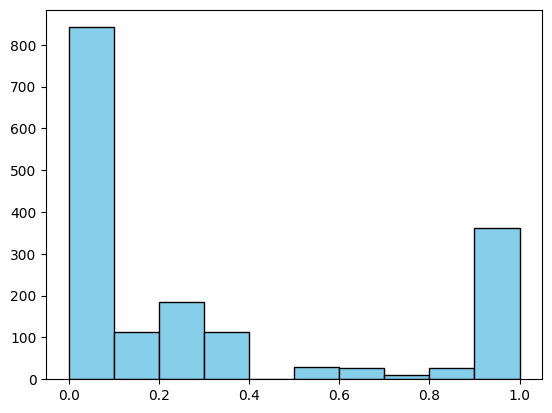

In [100]:
plt.hist(df['score'], bins=10, color='skyblue', edgecolor='black')
#the distribution of the scores
#let's classify test score >50% as success and the rest as failure

In [101]:
#what features can we get from the dataset and how can we use it to predict the success

In [102]:
df = df.drop(['failed', 'passed', 'total'], axis=1)

In [103]:
df

,ANON_ID,Class_ID,Question Id,Prompt,Stderr,Timestamp,Compiled,Stdoutput,prompt_len,score
0,1,COMPSCI101 - Lab 11,2,"\n\ndef arrange(words):\n # Remove all non-alpha characters and convert to lowercase\n words = [char.lower() for char in words if char.isalpha()]\n # Sort words alphabetically, capitalised letters first\n words.sort(key=str.lower)\n return ''.join(words)",Test failed for input abcabc\nExpected result was ccbbaa\nBut actual result was aabbcc\n\n,2023-08-24T12:18:17.540Z,1,Test failed for input abcabc\nExpected result was ccbbaa\nBut actual result was aabbcc\n\nTest failed for input <3I LOVE CS<3\nExpected result was CEILOSV\nBut actual result was ceilosv\n\nTest failed for input asdf\nExpected result was sfda\nBut actual result was adfs\n\nTest failed for input 3asd32df asdsaf3\nExpected result was sssffdddaaa\nBut actual result was aaadddffsss\n\nTest failed for input 123 X 456\nExpected result was X\nBut actual result was x\n\nTest failed for input T12heZ3yrie1\nExpected result was TZyrihee\nBut actual result was eehirtyz\n\nTest failed for input Z1 x2 v*\nExpected result was Zxv\nBut actual result was vxz\n\nTest failed for input abc BCA\nExpected result was ABCcba\nBut actual result was aabbcc\n\n,30,0.000
1,1,COMPSCI101 - Lab 11,2,\n\ndef arrange(words):\n words = ''.join(c for c in words if c.isalpha())\n words = words.upper() + words.lower()\n return ''.join(sorted(words)),Test failed for input 3asd32df asdsaf3\nExpected result was sssffdddaaa\nBut actual result was AAADDDFFSSSaaadddffsss\n\n,2023-08-23T09:46:09.959Z,1,Test failed for input 3asd32df asdsaf3\nExpected result was sssffdddaaa\nBut actual result was AAADDDFFSSSaaadddffsss\n\nTest failed for input T12heZ3yrie1\nExpected result was TZyrihee\nBut actual result was EEHIRTYZeehirtyz\n\nTest failed for input asdf\nExpected result was sfda\nBut actual result was ADFSadfs\n\nTest failed for input abc BCA\nExpected result was ABCcba\nBut actual result was AABBCCaabbcc\n\nTest failed for input Z1 x2 v*\nExpected result was Zxv\nBut actual result was VXZvxz\n\nTest failed for input <3I LOVE CS<3\nExpected result was CEILOSV\nBut actual result was CEILOSVceilosv\n\nTest failed for input abcabc\nExpected result was ccbbaa\nBut actual result was AABBCCaabbcc\n\nTest failed for input 123 X 456\nExpected result was X\nBut actual result was Xx\n\n,18,0.000
2,1,COMPSCI101 - Lab 11,2,\n\ndef arrange(words):\n # Create a set of all the letters in the words\n letters = set()\n for word in words:\n for letter in word:\n letters.add(letter)\n \n # Sort the letters alphabetically\n sorted_letters = sorted(list(letters))\n \n # Separate the capitalised letters from the lowercase\n capital_letters = []\n lower_letters = []\n for letter in sorted_letters:\n if letter.isupper():\n capital_letters.append(letter)\n else:\n lower_letters.append(letter)\n \n # Join the lists and return the result\n return ''.join(capital_letters + lower_letters),Test failed for input Z1 x2 v*\nExpected result was Zxv\nBut actual result was Z *12vx\n\n,2023-08-23T09:45:40.886Z,1,Test failed for input Z1 x2 v*\nExpected result was Zxv\nBut actual result was Z *12vx\n\nTest failed for input asdf\nExpected result was sfda\nBut actual result was adfs\n\nTest failed for input abcabc\nExpected result was ccbbaa\nBut actual result was abc\n\nTest failed for input abc BCA\nExpected result was ABCcba\nBut actual result was ABC abc\n\nTest failed for input 123 X 456\nExpected result was X\nBut actual result was X 123456\n\nTest failed for input <3I LOVE CS<3\nExpected result was CEILOSV\nBut actual result was CEILOSV 3<\n\nTest failed for input T12heZ3yrie1\nExpected result was TZyrihee\nBut actual result was TZ123ehiry\n\nTest failed for input 3asd32df asdsaf3\nExpected result was sssffdddaaa\nBut actual result was 23adfs\n\n,68,0.000
3,1,COMPSCI101 - Lab 11,1,"\n\ndef scramble(word, num): \n scrambled = """"\n for letter in word: \n scrambled += chr((ord(letter) - 97 + num) % 26 + 97) \n return scram